In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
import seaborn as sns
from keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
print(tf.__version__)

2.1.0


Using TensorFlow backend.


In [2]:
data = pd.read_csv('bitcoin_data.csv')
data.reset_index()

,index,Date,High,Low,Last,Bid,Ask,Volume,VWAP
0,0,2014-04-15,515.00,453.16,499.01,500.01,505.04,28535.844106,491.41
1,1,2014-04-16,548.00,494.02,534.00,535.01,536.00,31159.941300,520.21
2,2,2014-04-17,537.24,481.63,506.52,504.70,505.38,21126.375080,504.83
3,3,2014-04-18,508.43,470.00,487.00,484.14,487.00,11879.484756,485.72
4,4,2014-04-19,507.43,472.81,504.74,504.74,505.00,10262.195861,492.22
...,...,...,...,...,...,...,...,...,...
2378,2378,2020-11-14,16494.52,15970.33,16335.58,16335.58,16339.27,7842.488826,16279.18
2379,2379,2020-11-15,16341.89,15715.10,16086.34,16087.77,16094.81,5046.326705,15982.98
2380,2380,2020-11-16,16170.00,15786.46,15975.49,15969.41,15973.22,3226.276565,15979.39
2381,2381,2020-11-17,16894.93,15875.50,16724.62,16719.84,16729.63,7511.143605,16409.99


In [3]:
data = data.drop(columns='Date')


In [4]:
test = data.tail(20)
test

,High,Low,Last,Bid,Ask,Volume,VWAP
2363,13650.00,12993.00,13411.86,13413.35,13416.39,8948.197381,13318.04
2364,13675.56,13129.26,13577.60,13572.18,13581.82,8980.671631,13404.59
2365,14100.00,13420.97,13879.14,13878.39,13887.22,6394.173016,13762.10
2366,13907.47,13629.31,13711.21,13700.59,13711.21,2465.795017,13766.72
2367,13842.50,13220.00,13563.72,13570.69,13578.98,7062.704712,13545.15
2368,14083.76,13287.70,14041.58,14030.89,14041.58,7226.516356,13633.01
2369,14277.50,13520.87,14160.59,14162.68,14171.73,10925.676805,13908.16
2370,15770.58,14100.00,15605.04,15603.49,15608.32,18422.631860,14937.25
2371,15968.98,15196.01,15598.09,15598.10,15603.23,13479.467068,15570.55
2372,15778.60,14351.00,14838.97,14832.01,14842.70,10933.924192,15076.99


In [5]:
High = test.High.values
Low = test.Low.values
Volume = test.Volume.values
Last = test.Last.values

In [6]:
X = []
y = []

for i in range(len(High)):
    row = []
    yrow = []
    row.append(High[i])
    row.append(Low[i])
#     row.append(Volume[i])
    yrow.append(Last[i])
    X.append(row)
    y.append(yrow)
X = np.array(X)
y = np.array(y)
X

array([[13650.  , 12993.  ],
       [13675.56, 13129.26],
       [14100.  , 13420.97],
       [13907.47, 13629.31],
       [13842.5 , 13220.  ],
       [14083.76, 13287.7 ],
       [14277.5 , 13520.87],
       [15770.58, 14100.  ],
       [15968.98, 15196.01],
       [15778.6 , 14351.  ],
       [15664.9 , 14727.19],
       [15854.48, 14824.66],
       [15482.76, 15092.47],
       [15991.01, 15290.85],
       [16369.99, 15481.  ],
       [16494.52, 15970.33],
       [16341.89, 15715.1 ],
       [16170.  , 15786.46],
       [16894.93, 15875.5 ],
       [17868.  , 16570.  ]])

In [7]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler




In [8]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

In [9]:
horsepower = np.array(X_train)
horsepower2 = np.array(X_train)
horsepower_normalizer = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(horsepower)
horsepower_normalizer2 = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer2.adapt(horsepower2)

In [17]:
# # input_layer = Input(shape=(X.shape[1],))
# dense_layer_1 = Dense(100, input_shape=(X.shape[1],), activation='relu')
# dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
# dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
# output = Dense(1)

# model = Model([
#     Dense(100, input_dim=X.shape[1], activation='relu'),
#     Dense(50, activation='relu'),
#     Dense(25, activation='relu'),
#     Dense(units=1, activation='softmax')
# ])
# model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

horsepower_model = tf.keras.Sequential([
#     horsepower_normalizer,
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(units=1)
])


In [18]:
horsepower_model.predict(y_test[:10])

array([[1282.6438],
       [1041.2924],
       [1356.0498],
       [1196.2477]], dtype=float32)

In [19]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error' )

In [20]:
%%time
history = horsepower_model.fit(
    y_train, X_train,
    epochs=100,
    # suppress logging
    verbose=2,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Train on 12 samples, validate on 4 samples
Epoch 1/100
12/12 - 0s - loss: 13758.8545 - val_loss: 13175.4580
Epoch 2/100
12/12 - 0s - loss: 13399.4209 - val_loss: 12873.2715
Epoch 3/100
12/12 - 0s - loss: 13089.2529 - val_loss: 12554.0566
Epoch 4/100
12/12 - 0s - loss: 12761.6064 - val_loss: 12256.8848
Epoch 5/100
12/12 - 0s - loss: 12456.5859 - val_loss: 11913.8906
Epoch 6/100
12/12 - 0s - loss: 12104.5342 - val_loss: 11551.9629
Epoch 7/100
12/12 - 0s - loss: 11733.0439 - val_loss: 11167.6270
Epoch 8/100
12/12 - 0s - loss: 11338.5576 - val_loss: 10753.7363
Epoch 9/100
12/12 - 0s - loss: 10913.7354 - val_loss: 10336.1426
Epoch 10/100
12/12 - 0s - loss: 10485.1113 - val_loss: 9887.8926
Epoch 11/100
12/12 - 0s - loss: 10025.0225 - val_loss: 9404.9199
Epoch 12/100
12/12 - 0s - loss: 9529.2920 - val_loss: 8883.4863
Epoch 13/100
12/12 - 0s - loss: 8994.0859 - val_loss: 8320.7109
Epoch 14/100
12/12 - 0s - loss: 8416.4482 - val_loss: 7713.5630
Epoch 15/100
12/12 - 0s - loss: 7793.2632 - val_lo

In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,438.308746,231.204956,95
96,438.308746,231.204956,96
97,438.308746,231.204956,97
98,438.308746,231.204956,98
99,438.308746,231.204956,99


In [22]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

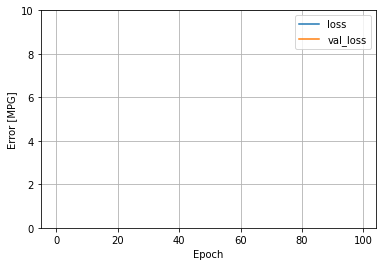

In [23]:
plot_loss(history)